In [1]:
# import libraries
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter


# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# classifier Library (Algorithms)
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataFrame = pd.read_csv("Customer-Churn.csv")
dataFrame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Checking for annomalities and data types
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
dataFrame['TotalCharges'] = pd.to_numeric(dataFrame['TotalCharges'], errors='coerce')

In [5]:
dataFrame.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
dataFrame['TotalCharges'].fillna((dataFrame['TotalCharges'].mean()), inplace=True)

In [7]:
dataFrame.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#check for data duplicates
print("There are {} duplicated data points in the dataset" .format(dataFrame.duplicated().sum()))

There are 0 duplicated data points in the dataset


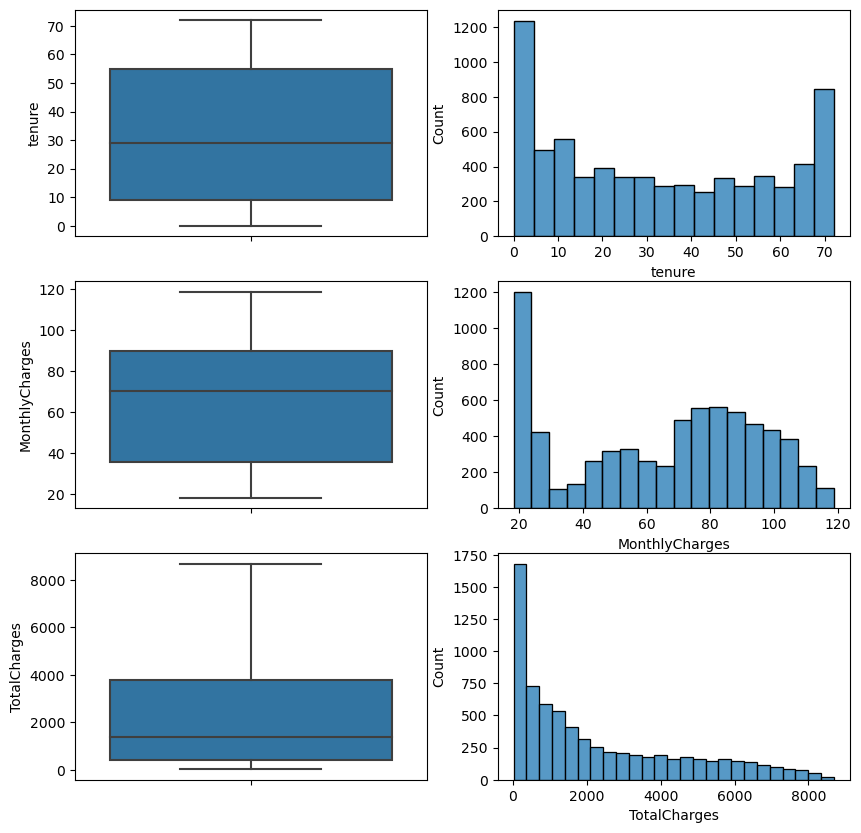

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
t = sns.boxplot(y= dataFrame['tenure'])
plt.subplot(3, 2, 2)
t = sns.histplot(x='tenure', data=dataFrame)

plt.subplot(3, 2, 3)
t = sns.boxplot(y= dataFrame['MonthlyCharges'])
plt.subplot(3, 2, 4)
t = sns.histplot(x='MonthlyCharges', data=dataFrame)

plt.subplot(3, 2, 5)
t = sns.boxplot(y= dataFrame['TotalCharges'])
plt.subplot(3, 2, 6)
t = sns.histplot(x='TotalCharges', data=dataFrame)

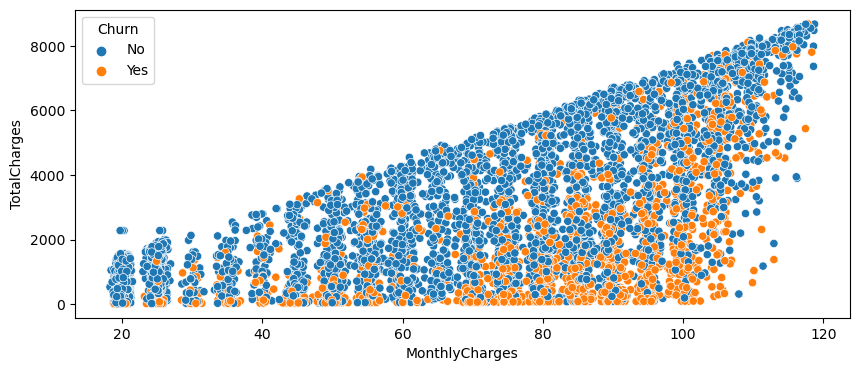

In [11]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=dataFrame, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.show()

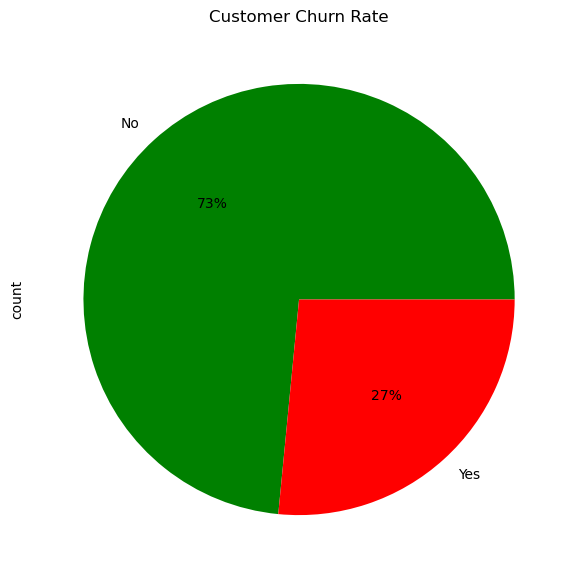

In [12]:
dataFrame["Churn"].value_counts().plot(kind="pie", autopct="%1.0f%%", 
                                       figsize=(7,7), colors=["green","red"], title= "Customer Churn Rate")
plt.show()

Text(0.5, 1.0, 'Churn by PaymentMethod')

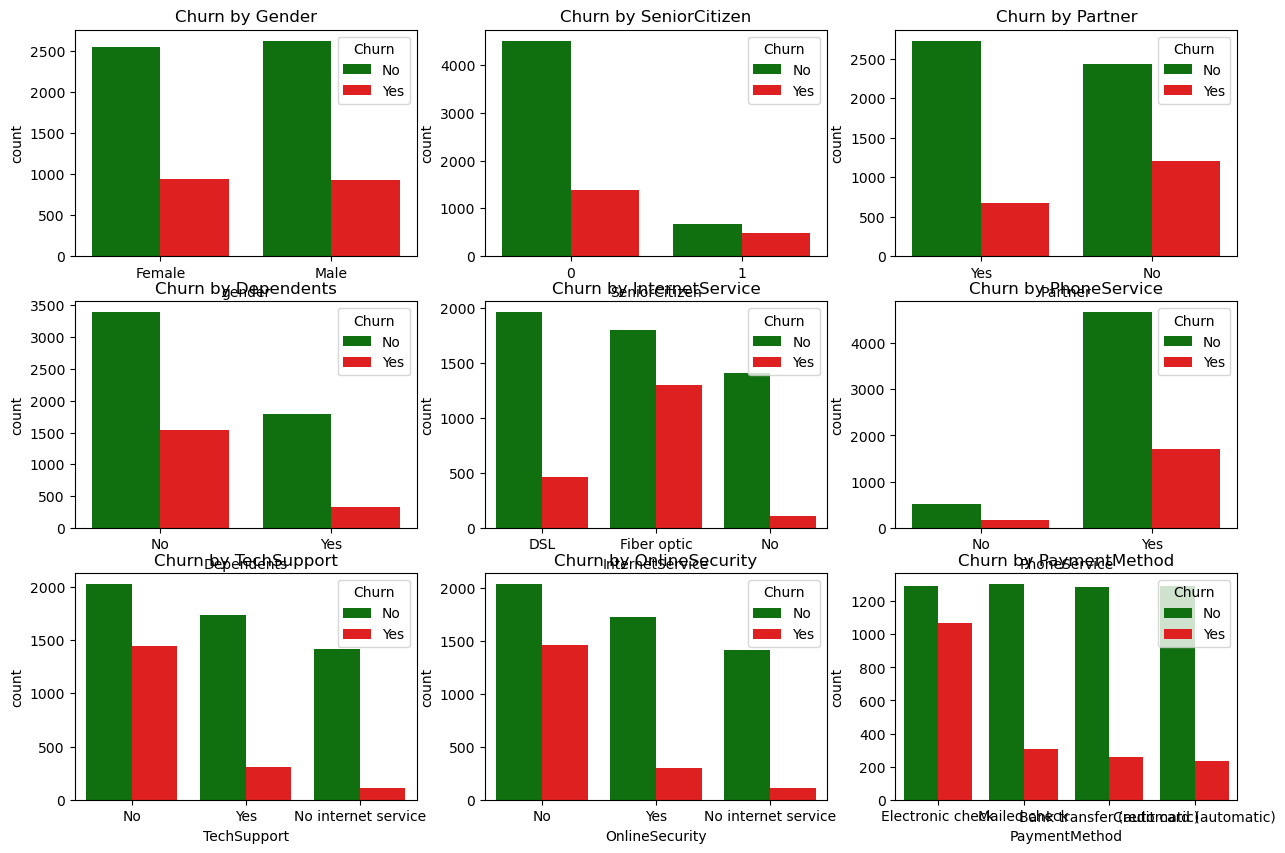

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


sns.countplot(x="gender", data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[0,0])
axs[0,0].set_title("Churn by Gender")

sns.countplot(x='SeniorCitizen', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[0,1])
axs[0,1].set_title("Churn by SeniorCitizen")

sns.countplot(x='Partner', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[0,2])
axs[0,2].set_title("Churn by Partner")

sns.countplot(x="Dependents", data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[1,0])
axs[1,0].set_title("Churn by Dependents")

sns.countplot(x='InternetService', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[1,1])
axs[1,1].set_title("Churn by InternetService")

sns.countplot(x='PhoneService', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[1,2])
axs[1,2].set_title("Churn by PhoneService")

sns.countplot(x="TechSupport", data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[2,0])
axs[2,0].set_title("Churn by TechSupport")

sns.countplot(x='OnlineSecurity', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[2,1])
axs[2,1].set_title("Churn by OnlineSecurity")

sns.countplot(x='PaymentMethod', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[2,2])
axs[2,2].set_title("Churn by PaymentMethod")

Text(0.5, 1.0, 'Churn by OnlineSecurity')

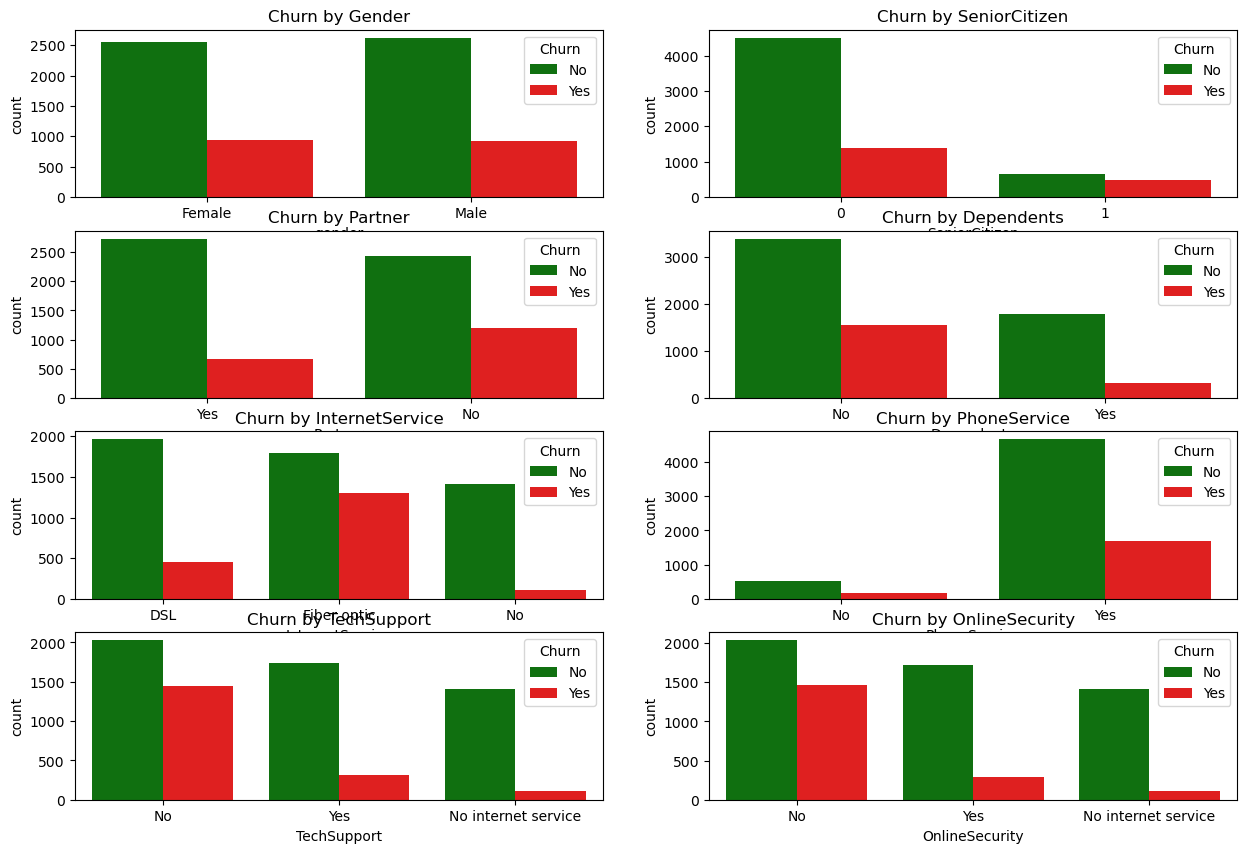

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))


sns.countplot(x="gender", data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[0,0])
axs[0,0].set_title("Churn by Gender")

sns.countplot(x='SeniorCitizen', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[0,1])
axs[0,1].set_title("Churn by SeniorCitizen")

sns.countplot(x='Partner', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[1,0])
axs[1,0].set_title("Churn by Partner")

sns.countplot(x="Dependents", data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[1,1])
axs[1,1].set_title("Churn by Dependents")

sns.countplot(x='InternetService', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[2,0])
axs[2,0].set_title("Churn by InternetService")

sns.countplot(x='PhoneService', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[2,1])
axs[2,1].set_title("Churn by PhoneService")

sns.countplot(x="TechSupport", data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[3,0])
axs[3,0].set_title("Churn by TechSupport")

sns.countplot(x='OnlineSecurity', data=dataFrame, hue="Churn", palette=["green", "red"], ax=axs[3,1])
axs[3,1].set_title("Churn by OnlineSecurity")



In [18]:
dataFrame.drop(["customerID"], axis=1, inplace=True)
dataFrame.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
encoder= LabelEncoder()
for c in dataFrame.columns[0:]:
    if(dataFrame[c].dtype=="object"):
        dataFrame[c]= encoder.fit_transform(dataFrame[c])
    else:
        dataFrame[c]=dataFrame[c]
dataFrame.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [21]:
dataFrame.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


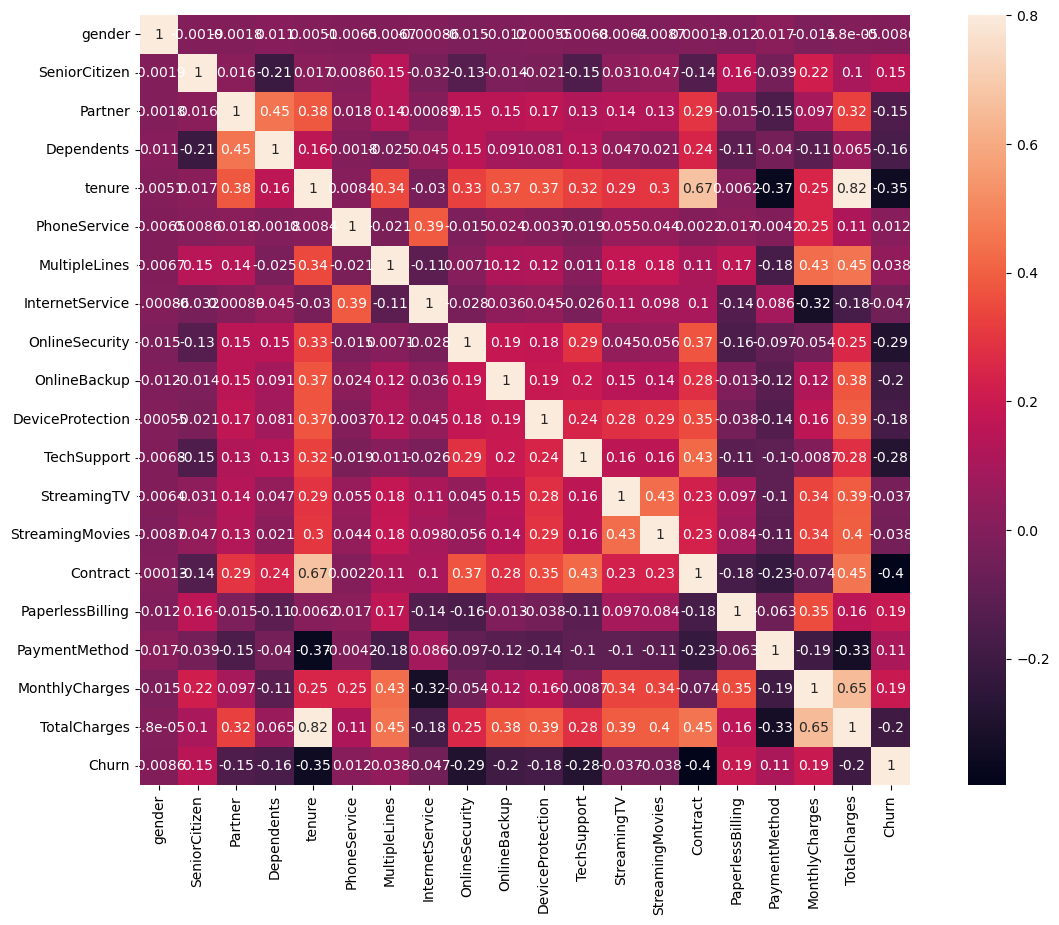

In [22]:
a=dataFrame.corr()
plt.figure(figsize=(15,10))
sns.heatmap(a, vmax=.8, square=True, annot=True)
plt.show()

In [23]:
class_0 = dataFrame[dataFrame['Churn'] == 0]
class_1 = dataFrame[dataFrame['Churn'] == 1]

In [24]:
# Oversample class_0 to match the size of class_1
oversampled_class_1 = resample(class_1,
                               replace=True,
                               n_samples=len(class_0),
                               random_state=1234)

In [25]:
print(oversampled_class_1.shape[0])
print(class_0.shape[0])

5174
5174


In [26]:
balanced_df= pd.concat([oversampled_class_1, class_0])

In [27]:
balanced_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3111,1,0,1,1,72,1,2,1,0,2,2,0,2,2,2,1,2,103.40,7372.65,1
2770,1,0,1,1,17,1,2,1,0,0,0,0,2,2,0,1,2,92.55,1515.10,1
5023,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.30,70.30,1
4084,0,0,0,0,1,1,0,1,0,0,0,0,2,0,0,0,2,78.05,78.05,1
4684,1,0,0,0,69,1,0,1,0,2,2,2,2,2,1,1,0,104.05,7262.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0


In [28]:
# Extracting features (X) and target variable (y)
x = balanced_df.drop('Churn', axis=1)  # Dropping 'churn' column to get features
y = balanced_df['Churn']  # Selecting only the 'churn' column as the target variable

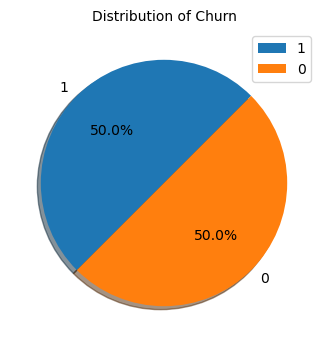

In [29]:
Churn_counts = y.value_counts()

# Create a pie chart
plt.figure(figsize=(6, 4))  # Define figure size
plt.pie(Churn_counts, labels=Churn_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=45)
plt.title('Distribution of Churn', size=10)
plt.legend()
plt.show()

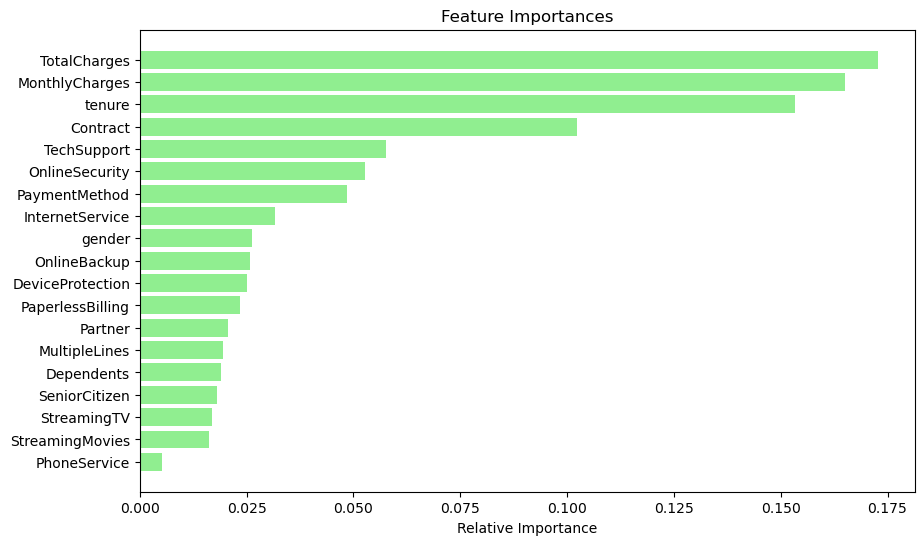

In [30]:
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Fitting in the RandomForestClassifier model to identify important features
model = RandomForestClassifier()
model.fit(x_scaled, y)
feature_names = list(x.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
x_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.666667,0.847264,0.848586
1,1.0,0.0,1.0,1.0,0.236111,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.739303,0.172663
2,0.0,0.0,0.0,0.0,0.013889,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.517910,0.005943
3,0.0,0.0,0.0,0.0,0.013889,1.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.595025,0.006837
4,1.0,0.0,0.0,0.0,0.958333,1.0,0.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.000000,0.853731,0.835818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,0.000000,0.028856,0.161620
10344,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521
10345,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461
10346,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809


In [32]:
#split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=1234)

In [33]:
print('Total number of data in X_train :{}' .format(len(x_train)))
print('Total number of data in X_test :{}' .format(len(x_test)))
print('Total number of data in y_train :{}' .format(len(y_train)))
print('Total number of data in y_test :{}' .format(len(y_test)))

Total number of data in X_train :7243
Total number of data in X_test :3105
Total number of data in y_train :7243
Total number of data in y_test :3105


In [34]:
#Logistic Regression

# Building a base mode
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression()

In [35]:
#creating a prediction file
log_pred = logReg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, log_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, log_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.76
Confusion Matrix:
[[1111  441]
 [ 313 1240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1552
           1       0.74      0.80      0.77      1553

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



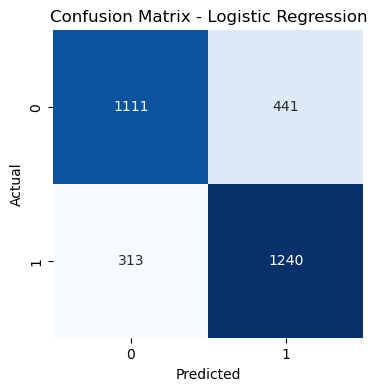

In [39]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, log_pred)

# Plot heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
# Decision Tree - Make predictions on the test set
dt_pred = dtree.predict(x_test)

# Evaluate the Decision Tree model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, dt_pred)
print("Decision Tree Confusion Matrix:")
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, dt_pred)
print("Decision Tree Classification Report:")
print(class_report)


Decision Tree Accuracy: 0.85
Decision Tree Confusion Matrix:
[[1209  343]
 [ 124 1429]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1552
           1       0.81      0.92      0.86      1553

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105



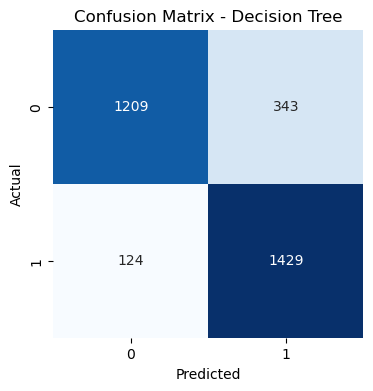

In [64]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_pred)

# Plot heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [54]:
# Create a RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the RandomForestClassifier to the training data
Classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Make predictions on the test set
Classifier_pred = Classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, Classifier_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, Classifier_pred)
print("Random Forest Confusion Matrix:")
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, Classifier_pred)
print("Random Forest Classification Report:")
print(class_report)


Random Forest Accuracy: 0.89
Random Forest Confusion Matrix:
[[1300  252]
 [ 105 1448]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1552
           1       0.85      0.93      0.89      1553

    accuracy                           0.89      3105
   macro avg       0.89      0.89      0.88      3105
weighted avg       0.89      0.89      0.88      3105



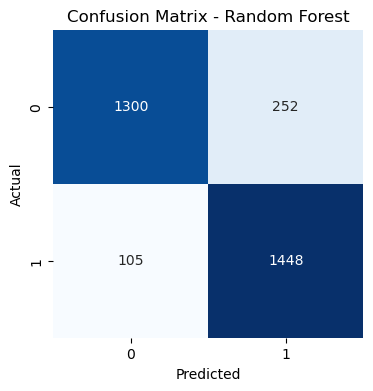

In [65]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, Classifier_pred)

# Plot heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=Classifier.classes_, yticklabels=Classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()